In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.ensemble import IsolationForest

pd.set_option("display.max_columns", 200)
np.random.seed(16481003)

In [2]:
df = pd.read_csv("../../../data/ffiec_v2.csv")
df.head(3)

,IDRSSD,quarter,RCON0010_qoq,RCON0020_qoq,RCON0080_qoq,RCON0090_qoq,RCON0352_qoq,RCON1420_qoq,RCON1460_qoq,RCON1545_qoq,RCON1590_qoq,RCON1763_qoq,RCON1764_qoq,RCON1797_qoq,RCON2107_qoq,RCON2122_qoq,RCON2123_qoq,RCON2165_qoq,RCON2200_qoq,RCON2202_qoq,RCON2203_qoq,RCON2210_qoq,RCON2213_qoq,RCON2215_qoq,RCON2216_qoq,RCON2236_qoq,RCON2365_qoq,RCON2377_qoq,RCON2385_qoq,RCON2520_qoq,RCON2530_qoq,RCON3360_qoq,RCON3386_qoq,RCON3387_qoq,RCON3485_qoq,RCON3493_qoq,RCON3494_qoq,RCON3495_qoq,RCON3499_qoq,RCON3500_qoq,RCON3501_qoq,RCON5367_qoq,RCON5368_qoq,RCON5370_qoq,RCON5398_qoq,RCON5399_qoq,RCON5400_qoq,RCON5508_qoq,RCON5509_qoq,RCON5510_qoq,RCON5511_qoq,RCON5512_qoq,RCON5597_qoq,RCON6631_qoq,RCON6636_qoq,RCON6648_qoq,RCON6810_qoq,RCON6835_qoq,RCON9999_qoq,RCONA564_qoq,RCONA565_qoq,RCONA566_qoq,RCONA567_qoq,RCONA568_qoq,RCONA569_qoq,RCONB534_qoq,RCONB538_qoq,RCONB539_qoq,RCONB549_qoq,RCONB550_qoq,RCONB551_qoq,RCONB552_qoq,RCONB561_qoq,RCONB562_qoq,RCONB563_qoq,RIAD0093_qoq,RIAD3123_qoq,RIAD3196_qoq,RIAD3210_qoq,RIAD3217_qoq,RIAD3521_qoq,RIAD3584_qoq,RIAD3585_qoq,RIAD3588_qoq,RIAD3589_qoq,RIAD4010_qoq,RIAD4012_qoq,RIAD4020_qoq,RIAD4024_qoq,RIAD4060_qoq,RIAD4065_qoq,RIAD4070_qoq,RIAD4073_qoq,RIAD4074_qoq,RIAD4079_qoq,RIAD4080_qoq,RIAD4092_qoq,RIAD4093_qoq,RIAD4107_qoq,RIAD4115_qoq,RIAD4135_qoq,RIAD4150_qoq,RIAD4180_qoq,RIAD4185_qoq,RIAD4200_qoq,RIAD4217_qoq,RIAD4230_qoq,RIAD4300_qoq,RIAD4301_qoq,RIAD4302_qoq,RIAD4313_qoq,RIAD4340_qoq,RIAD4356_qoq,RIAD4415_qoq,RIAD4460_qoq,RIAD4470_qoq,RIAD4507_qoq,RIAD4508_qoq,RIAD4513_qoq,RIAD4518_qoq,RIAD4605_qoq,RIAD4618_qoq,RIAD4628_qoq,RIAD4635_qoq,RIAD4644_qoq,RIAD4646_qoq,RIAD4652_qoq,RIAD4655_qoq,RIAD4662_qoq,RIAD4665_qoq,RIAD5409_qoq,RIAD5410_qoq,RIAD5411_qoq,RIAD5412_qoq,RIAD5415_qoq,RIAD5416_qoq,RIAD8431_qoq,RIAD8757_qoq,RIAD8758_qoq,RIAD8759_qoq,RIAD8760_qoq,RIADA220_qoq,RIADA251_qoq,RIADB485_qoq,RIADB486_qoq,RIADB488_qoq,RIADB489_qoq,RIADB491_qoq,RIADB492_qoq,RIADB493_qoq,RIADB496_qoq,RIADB497_qoq,RIADB507_qoq,RIADB508_qoq,RIADB509_qoq,RIADB511_qoq,RIADB514_qoq,RIADB515_qoq,RIADB522_qoq
0,451965,03/31/2002,-1.625823,0.560538,-18.271955,-47.692308,17.665109,1.806240,11.295681,85.901639,6.570743,2.845451,-79.824561,89.144883,2.290076,21.491026,0.0,-18.148906,11.810797,20.000000,14.141414,8.044144,0.0,7.636923,0.0,0.0,100.000000,0.0,13.086239,0.0,-27.272727,38.230929,8.411215,4.044944,24.497992,-66.666667,-66.666667,500.000000,425.00000,0.0,-20.000000,75.482929,-44.793850,981.037277,-24.324324,-66.666667,0.000000,0.0,0.0,-18.181818,-100.0,-13.513514,100.000000,1.406074,17.626190,-31.420861,12.775842,-13.145540,0.049973,30.017435,-84.390609,-79.711538,653.644989,433.048744,-2.586207,0.0,966.666667,23.866348,7.716205,13.169895,5.741388,0.0,900.000000,42.547638,17.417065,-55.747126,-4.651163,-89.130435,14.547811,17.819188,0.0,0.0,0.0,0.0,0.0,3.066202,-11.250000,-98.944823,-40.909091,-4.347826,-8.620690,-12.676056,-50.982962,35.528942,-45.424054,8.000000,-12.323944,1.451279,-1.869688,-58.139535,25.082508,10.937112,-53.048780,-36.923077,-48.809524,10.179641,7.142857,-53.401899,-41.147132,4.411765,0.0,-56.408228,0.0,-100.0,-100.0,0.0,0.0,-62.500000,0.0,0.0,41.666667,0.0,100.0,25.454545,-63.636364,-100.0,0.0,-80.000000,0.0,-100.0,0.0,0.0,0.0,0.0,-400.0,-3923.657143,-70.625000,-36.363636,28.571429,0.0,0.0,-6.557377,0.0,100.0,10.975610,-20.0,-23.148148,100.0,50.931677,100.0,-108.160622,11.075949,0.0,17.819188,0.0,-55.384615,0.0,0.0,-4.114134
1,451965,03/31/2003,-29.071267,4.252269,-17.157712,-14.705882,54.150451,-9.838710,17.313433,-36.155203,6.120612,6.431017,-39.130435,318.575779,79.850746,63.158670,0.0,-20.500000,36.178956,-16.666667,-60.619469,-52.535868,0.0,-49.562632,0.0,0.0,446.308571,0.0,61.117116,100.0,655.542857,52.076444,7.801724,4.131244,19.193548,225.000000,100.000000,-8.333333,-90.47619,100.0,-16.666667,120.800000,142.468354,66.844078,110.714286,177.065637,57.142857,0.0,100.0,22.222222,0.0,-68.750000,92.332993,15.585136,46.102012,-9.136014,23.059639,-2.822823,0.049949,210.981152,-82.880000,

In [3]:
df.dtypes.value_counts()

float64    157
int64        1
object       1
Name: count, dtype: int64

In [4]:
non_feature_cols = ["IDRSSD", "quarter"]
X = df.drop(columns=non_feature_cols)
X.shape

(557, 157)

In [5]:
# sanity check: all numeric? / Empty index?
X.select_dtypes(exclude=["number"]).columns
print(f"Feature matrix shape: {X.shape}")
print(f"Number of unique banks: {df['IDRSSD'].nunique()}")

Feature matrix shape: (557, 157)
Number of unique banks: 6


In [6]:
# Cell 4: Analyze data availability per bank
bank_counts = df.groupby('IDRSSD').size().sort_values(ascending=False)
print("\nData availability per bank:")
print(f"Banks with ≥20 quarters: {(bank_counts >= 20).sum()}")
print(f"Banks with <20 quarters: {(bank_counts < 20).sum()}")
print("\nTop 10 banks by number of quarters:")
print(bank_counts.head(10))


Data availability per bank:
Banks with ≥20 quarters: 6
Banks with <20 quarters: 0

Top 10 banks by number of quarters:
IDRSSD
451965     98
476810     98
480228     98
852218     98
1456501    98
2182786    67
dtype: int64


In [7]:
# Cell 5: Bank-Specific Isolation Forest Models
MIN_QUARTERS = 20  # Minimum quarters required to train a bank-specific model
TEST_SIZE = 0.25
CONTAMINATION = 0.05  # Expected proportion of anomalies

# Storage for results
all_results = []
bank_models = {}  # Store models for later analysis
banks_processed = 0
banks_skipped = 0

print("Training bank-specific Isolation Forest models...\n")

for bank_id in df['IDRSSD'].unique():
    # Filter data for this bank
    bank_data = df[df['IDRSSD'] == bank_id].copy()
    
    # Check if sufficient data exists
    if len(bank_data) < MIN_QUARTERS:
        banks_skipped += 1
        print(f"Skipping bank {bank_id}: Only {len(bank_data)} quarters (need ≥{MIN_QUARTERS})")
        continue
    
    banks_processed += 1
    print(f"Processing bank {bank_id}: {len(bank_data)} quarters")
    
    # Create feature matrix for this bank
    X_bank = bank_data.drop(['IDRSSD', 'quarter'], axis=1)
    
    # Train/test split
    X_train, X_test = train_test_split(
        X_bank, 
        test_size=TEST_SIZE, 
        random_state=42
    )
    
    # Create preprocessing pipeline
    preprocess = Pipeline([
        ('impute', SimpleImputer(strategy='median')),
        ('scale', StandardScaler())
    ])
    
    # Fit preprocessing on training data
    X_train_p = preprocess.fit_transform(X_train)
    X_test_p = preprocess.transform(X_test)
    
    # Train Isolation Forest
    iso = IsolationForest(
        contamination=CONTAMINATION,
        random_state=16481003,
        n_estimators=100
    )
    iso.fit(X_train_p)
    
    # Score test set
    test_scores = iso.score_samples(X_test_p)
    test_anom_score = -test_scores  # Higher = more anomalous
    test_pred = (iso.predict(X_test_p) == -1).astype(int)
    
    # Create results for this bank
    bank_results = bank_data.loc[X_test.index, ['IDRSSD', 'quarter']].copy()
    bank_results['anom_score'] = test_anom_score
    bank_results['is_anomaly'] = test_pred
    bank_results['model_type'] = 'bank_specific'
    
    all_results.append(bank_results)
    
    # Store model and preprocessing pipeline for later use
    bank_models[bank_id] = {
        'model': iso,
        'preprocessor': preprocess,
        'n_train': len(X_train),
        'n_test': len(X_test)
    }

print(f"\n=== Summary ===")
print(f"Banks processed: {banks_processed}")
print(f"Banks skipped (insufficient data): {banks_skipped}")

Training bank-specific Isolation Forest models...

Processing bank 451965: 98 quarters
Processing bank 476810: 98 quarters
Processing bank 480228: 98 quarters
Processing bank 852218: 98 quarters
Processing bank 1456501: 98 quarters
Processing bank 2182786: 67 quarters

=== Summary ===
Banks processed: 6
Banks skipped (insufficient data): 0


In [8]:
# Cell 6: Combine results
results = pd.concat(all_results, ignore_index=True)

print(f"Total test observations across all banks: {len(results)}")
print(f"Total anomalies detected: {results['is_anomaly'].sum()}")
print(f"Anomaly rate: {results['is_anomaly'].mean():.2%}")

print("\nTop 20 anomalies across all banks:")
results.sort_values('anom_score', ascending=False).head(20)

Total test observations across all banks: 142
Total anomalies detected: 7
Anomaly rate: 4.93%

Top 20 anomalies across all banks:


,IDRSSD,quarter,anom_score,is_anomaly,model_type
70,480228,09/30/2001,0.616302,1,bank_specific
45,476810,09/30/2001,0.613485,1,bank_specific
95,852218,09/30/2001,0.600775,1,bank_specific
20,451965,09/30/2001,0.583471,1,bank_specific
126,2182786,06/30/2009,0.564581,1,bank_specific
109,1456501,03/31/2002,0.556429,1,bank_specific
120,1456501,09/30/2001,0.525709,1,bank_specific
5,451965,12/31/2010,0.521413,0,bank_specific
79,852218,12/31/2008,0.517295,0,bank_specific
65,480228,03/31/2006,0.501063,0,bank_specific


In [9]:
# Cell 7: Analysis by bank
bank_summary = results.groupby('IDRSSD').agg({
    'anom_score': ['count', 'mean', 'max'],
    'is_anomaly': 'sum'
}).round(3)

bank_summary.columns = ['n_test_obs', 'avg_anom_score', 'max_anom_score', 'n_anomalies']
bank_summary['anomaly_rate'] = (bank_summary['n_anomalies'] / bank_summary['n_test_obs'] * 100).round(2)

print("Anomaly summary by bank:")
bank_summary.sort_values('max_anom_score', ascending=False)

Anomaly summary by bank:


,n_test_obs,avg_anom_score,max_anom_score,n_anomalies,anomaly_rate
IDRSSD,,,,,
480228,25,0.398,0.616,1,4.00
476810,25,0.394,0.613,1,4.00
852218,25,0.394,0.601,1,4.00
451965,25,0.399,0.583,1,4.00
2182786,17,0.419,0.565,1,5.88
1456501,25,0.402,0.556,2,8.00


In [10]:
# Cell 8: Deep dive into specific bank
BANK_TO_EXAMINE = results.loc[results['anom_score'].idxmax(), 'IDRSSD']

bank_anomalies = results[results['IDRSSD'] == BANK_TO_EXAMINE].sort_values('anom_score', ascending=False)

print(f"\n=== Anomalies for Bank {BANK_TO_EXAMINE} ===")
print(f"Total observations: {len(bank_anomalies)}")
print(f"Anomalies detected: {bank_anomalies['is_anomaly'].sum()}")
print(f"\nTop 10 most anomalous quarters:")
bank_anomalies.head(10)


=== Anomalies for Bank 480228 ===
Total observations: 25
Anomalies detected: 1

Top 10 most anomalous quarters:


,IDRSSD,quarter,anom_score,is_anomaly,model_type
70,480228,09/30/2001,0.616302,1,bank_specific
65,480228,03/31/2006,0.501063,0,bank_specific
54,480228,12/31/2008,0.473718,0,bank_specific
60,480228,06/30/2008,0.432756,0,bank_specific
63,480228,06/30/2003,0.409132,0,bank_specific
59,480228,03/31/2002,0.401787,0,bank_specific
55,480228,12/31/2010,0.395262,0,bank_specific
72,480228,09/30/2020,0.391573,0,bank_specific
53,480228,03/31/2020,0.389188,0,bank_specific
58,480228,03/31/2012,0.389026,0,bank_specific


In [11]:
# Cell 9: Feature importance analysis function
def analyze_anomaly_features(bank_id, quarter, df, bank_models, top_n=20):
    """
    Show which features are most extreme for a given anomalous observation
    """
    # Get the observation
    obs = df[(df['IDRSSD'] == bank_id) & (df['quarter'] == quarter)]
    
    if len(obs) == 0:
        print(f"No data found for bank {bank_id}, quarter {quarter}")
        return
    
    if bank_id not in bank_models:
        print(f"No model found for bank {bank_id}")
        return
    
    # Get features
    X_obs = obs.drop(['IDRSSD', 'quarter'], axis=1)
    
    # Transform using bank's preprocessor
    preprocessor = bank_models[bank_id]['preprocessor']
    X_obs_p = preprocessor.transform(X_obs)
    
    # Get feature names from the preprocessor (handles dropped columns)
    # The StandardScaler stores the feature names after fitting
    try:
        # Try to get feature names from the pipeline
        feature_names_out = preprocessor.get_feature_names_out()
        # Remove the step prefixes like 'scale__' if present
        feature_names = [name.split('__')[-1] for name in feature_names_out]
    except:
        # Fallback: use the columns that have non-zero variance after preprocessing
        # This handles cases where some columns were all NaN for this bank
        feature_mask = ~np.all(np.isnan(preprocessor.named_steps['impute'].transform(X_obs)), axis=0)
        feature_names = X_obs.columns[feature_mask].tolist()
    
    # Create z-scores (standardized values)
    z_scores = pd.Series(
        X_obs_p.ravel(),
        index=feature_names
    )
    
    # Rank by absolute z-score
    z_abs = z_scores.abs().sort_values(ascending=False)

    # Get raw values for the features that were kept
    raw_values = []
    for feat in z_abs.index[:top_n]:
        if feat in X_obs.columns:
            raw_values.append(X_obs.iloc[0][feat])
        else:
            raw_values.append(np.nan)

    # Create summary
    feature_analysis = pd.DataFrame({
        'feature': z_abs.index[:top_n],
        'raw_value': X_obs.iloc[0][z_abs.index[:top_n]].values,
        'z_score': z_scores[z_abs.index[:top_n]].values,
        'abs_z': z_abs.head(top_n).values
    }).set_index('feature')
    
    print(f"\n=== Feature Analysis: Bank {bank_id}, Quarter {quarter} ===")
    print(f"\nTop {top_n} most extreme features (by |z-score|):")
    print(feature_analysis.round(3))
    
    return feature_analysis

# Example: Analyze the top anomaly
top_anomaly = results.loc[results['anom_score'].idxmax()]
analyze_anomaly_features(
    bank_id=top_anomaly['IDRSSD'],
    quarter=top_anomaly['quarter'],
    df=df,
    bank_models=bank_models
)


=== Feature Analysis: Bank 480228, Quarter 09/30/2001 ===

Top 20 most extreme features (by |z-score|):
              raw_value  z_score  abs_z
feature                                
RIAD4200_qoq   1363.801    6.016  6.016
RCON9999_qoq     -1.184   -5.958  5.958
RCONB534_qoq   2924.000    5.888  5.888
RIAD4618_qoq   1662.000    5.408  5.408
RCON6636_qoq    -84.536   -5.304  5.304
RCON2200_qoq    -83.969   -5.111  5.111
RCONB550_qoq    -83.815   -5.048  5.048
RCON2385_qoq    -83.278   -4.995  4.995
RCONB563_qoq    -87.095   -4.851  4.851
RCON2202_qoq    568.750    4.794  4.794
RCON3360_qoq    -68.643   -4.696  4.696
RIAD8431_qoq    823.235    4.677  4.677
RCON2122_qoq    -68.613   -4.647  4.647
RCON2215_qoq    -86.432   -4.629  4.629
RCONB549_qoq    -86.148   -4.607  4.607
RCON0020_qoq    124.145    4.450  4.450
RIADB492_qoq   4112.500    4.442  4.442
RIAD4135_qoq    -50.304   -4.288  4.288
RCON0352_qoq    -94.604   -4.279  4.279
RCON2210_qoq    -87.447   -4.044  4.044


,raw_value,z_score,abs_z
feature,,,
RIAD4200_qoq,1363.800905,6.016393,6.016393
RCON9999_qoq,-1.183667,-5.958241,5.958241
RCONB534_qoq,2924.000000,5.888124,5.888124
RIAD4618_qoq,1662.000000,5.408476,5.408476
RCON6636_qoq,-84.536177,-5.303584,5.303584
RCON2200_qoq,-83.969420,-5.110691,5.110691
RCONB550_qoq,-83.815365,-5.047973,5.047973
RCON2385_qoq,-83.277579,-4.995221,4.995221
RCONB563_qoq,-87.095276,-4.851383,4.851383


In [12]:
# Cell 14: Bank name dictionary and display results with bank names

# Bank ID to name mapping
bank_names = {
    451965: "Wells Fargo Bank",
    476810: "Citibank",
    480228: "Bank of America",
    852218: "JPMorgan Chase Bank",
    1456501: "Morgan Stanley Bank",
    2182786: "Goldman Sachs Bank USA"
}

# Add bank names to results dataframe
results['bank_name'] = results['IDRSSD'].map(bank_names)

# Display top anomalies for each bank
print("="*80)
print("TOP ANOMALIES BY BANK")
print("="*80)

for bank_id in sorted(results['IDRSSD'].unique()):
    bank_data = results[results['IDRSSD'] == bank_id].sort_values('anom_score', ascending=False)
    bank_name = bank_names[bank_id]
    
    print(f"\n{'='*80}")
    print(f"{bank_name} (IDRSSD: {bank_id})")
    print(f"{'='*80}")
    print(bank_data[['bank_name', 'quarter', 'anom_score', 'is_anomaly']].head(5).to_string(index=False))

TOP ANOMALIES BY BANK

Wells Fargo Bank (IDRSSD: 451965)
       bank_name    quarter  anom_score  is_anomaly
Wells Fargo Bank 09/30/2001    0.583471           1
Wells Fargo Bank 12/31/2010    0.521413           0
Wells Fargo Bank 06/30/2021    0.467212           0
Wells Fargo Bank 06/30/2003    0.433381           0
Wells Fargo Bank 12/31/2002    0.426570           0

Citibank (IDRSSD: 476810)
bank_name    quarter  anom_score  is_anomaly
 Citibank 09/30/2001    0.613485           1
 Citibank 03/31/2002    0.480980           0
 Citibank 12/31/2008    0.427933           0
 Citibank 06/30/2021    0.426831           0
 Citibank 03/31/2012    0.422913           0

Bank of America (IDRSSD: 480228)
      bank_name    quarter  anom_score  is_anomaly
Bank of America 09/30/2001    0.616302           1
Bank of America 03/31/2006    0.501063           0
Bank of America 12/31/2008    0.473718           0
Bank of America 06/30/2008    0.432756           0
Bank of America 06/30/2003    0.409132       

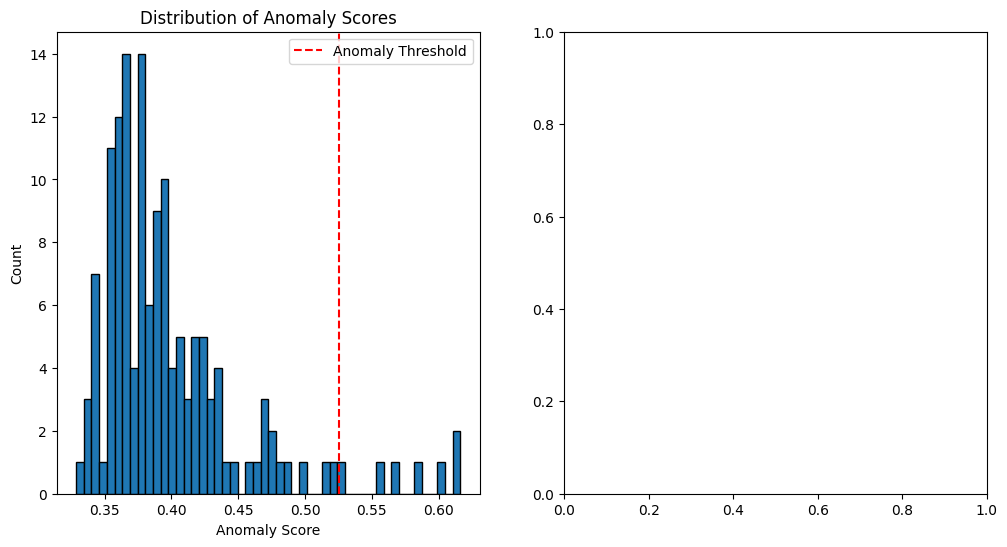

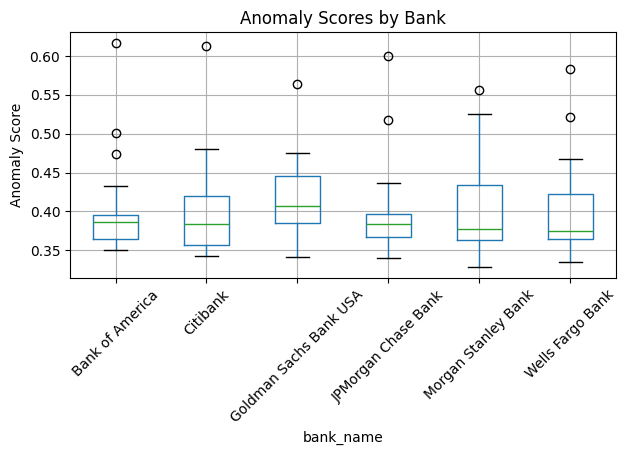

Anomaly Score Statistics:
Mean: 0.4000
Median: 0.3847
Threshold for is_anomaly=1: 0.5257

Anomalies detected: 7 out of 142 (4.9%)


In [13]:
#================================================================================
#    TEST 1:
#================================================================================


# Cell: Verify anomaly score distribution
import matplotlib.pyplot as plt

# Look at the distribution of scores
plt.figure(figsize=(12, 6))

# Histogram of all anomaly scores
plt.subplot(1, 2, 1)
plt.hist(results['anom_score'], bins=50, edgecolor='black')
plt.axvline(results[results['is_anomaly']==1]['anom_score'].min(), color='red', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Anomaly Score')
plt.ylabel('Count')
plt.title('Distribution of Anomaly Scores')
plt.legend()

# Boxplot by bank
plt.subplot(1, 2, 2)
results.boxplot(column='anom_score', by='bank_name', rot=45)
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores by Bank')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

# Summary statistics
print("Anomaly Score Statistics:")
print(f"Mean: {results['anom_score'].mean():.4f}")
print(f"Median: {results['anom_score'].median():.4f}")
print(f"Threshold for is_anomaly=1: {results[results['is_anomaly']==1]['anom_score'].min():.4f}")
print(f"\nAnomalies detected: {results['is_anomaly'].sum()} out of {len(results)} ({results['is_anomaly'].mean():.1%})")

In [14]:
#================================================================================
#    TEST 2:
#================================================================================


# Cell: Check if anomalies align with known events

# Look at temporal patterns
anomalies_by_quarter = results[results['is_anomaly']==1].groupby('quarter').size().sort_values(ascending=False)

print("Quarters with Most Anomalies Across All Banks:")
print(anomalies_by_quarter.head(10))

# Check if 9/30/2001 (post-9/11) appears frequently
print(f"\nNumber of banks with anomalies in 9/30/2001: {results[(results['quarter']=='9/30/2001') & (results['is_anomaly']==1)].shape[0]}")
print(f"Number of banks with anomalies in 2008-2009 (financial crisis): {results[(results['quarter'].str.contains('2008|2009')) & (results['is_anomaly']==1)].shape[0]}")

Quarters with Most Anomalies Across All Banks:
quarter
09/30/2001    5
03/31/2002    1
06/30/2009    1
dtype: int64

Number of banks with anomalies in 9/30/2001: 0
Number of banks with anomalies in 2008-2009 (financial crisis): 1


In [15]:
#================================================================================
#    TEST 3:
#================================================================================


# Cell: Analyze features driving the top anomalies

# For the #1 anomaly (Bank of America, 9/30/2001)
print("="*80)
print("DEEP DIVE: Why was Bank of America 9/30/2001 flagged?")
print("="*80)

top_anom = results.loc[results['anom_score'].idxmax()]
feature_analysis = analyze_anomaly_features(
    bank_id=top_anom['IDRSSD'],
    quarter=top_anom['quarter'],
    df=df,
    bank_models=bank_models,
    top_n=10  # Just top 10 features
)

print("\n" + "="*80)
print("INTERPRETATION:")
print("="*80)
print("Z-scores > 3.0 = extremely unusual (99.7% of data is within ±3 standard deviations)")
print("Z-scores > 6.0 = virtually impossible by chance")
print("\nIf you see z-scores of 5-7, these are REAL anomalies, not random ranking.")

DEEP DIVE: Why was Bank of America 9/30/2001 flagged?

=== Feature Analysis: Bank 480228, Quarter 09/30/2001 ===

Top 10 most extreme features (by |z-score|):
              raw_value  z_score  abs_z
feature                                
RIAD4200_qoq   1363.801    6.016  6.016
RCON9999_qoq     -1.184   -5.958  5.958
RCONB534_qoq   2924.000    5.888  5.888
RIAD4618_qoq   1662.000    5.408  5.408
RCON6636_qoq    -84.536   -5.304  5.304
RCON2200_qoq    -83.969   -5.111  5.111
RCONB550_qoq    -83.815   -5.048  5.048
RCON2385_qoq    -83.278   -4.995  4.995
RCONB563_qoq    -87.095   -4.851  4.851
RCON2202_qoq    568.750    4.794  4.794

INTERPRETATION:
Z-scores > 3.0 = extremely unusual (99.7% of data is within ±3 standard deviations)
Z-scores > 6.0 = virtually impossible by chance

If you see z-scores of 5-7, these are REAL anomalies, not random ranking.


In [16]:
#================================================================================
#    TEST 4:
#================================================================================



# Cell: Sanity check - compare to random labeling

# What if we randomly assigned anomalies?
np.random.seed(42)
results['random_anomaly'] = np.random.choice([0, 1], size=len(results), p=[0.95, 0.05])

print("Model-detected anomalies vs Random anomalies:")
print(f"\nModel flags 9/30/2001 for {results[(results['quarter']=='9/30/2001') & (results['is_anomaly']==1)].shape[0]} banks")
print(f"Random flags 9/30/2001 for {results[(results['quarter']=='9/30/2001') & (results['random_anomaly']==1)].shape[0]} banks")

print(f"\nModel avg anomaly score: {results[results['is_anomaly']==1]['anom_score'].mean():.4f}")
print(f"Random avg anomaly score: {results[results['random_anomaly']==1]['anom_score'].mean():.4f}")

Model-detected anomalies vs Random anomalies:

Model flags 9/30/2001 for 0 banks
Random flags 9/30/2001 for 0 banks

Model avg anomaly score: 0.5801
Random avg anomaly score: 0.4062


In [17]:
# Cell: Does Bank of America's 9/30/2001 anomaly make sense?
# Compare flagged quarter to normal quarters for a set of top-flagged features

boa_2001 = df[(df['IDRSSD']==480228) & (df['quarter']=='09/30/2001')]
boa_normal = df[(df['IDRSSD']==480228) & (df['quarter']!='09/30/2001')]

print("Bank of America - 09/30/2001 vs Normal Quarters")
print("="*80)

if len(boa_2001) == 0:
    print("WARNING: 09/30/2001 not found in dataset for Bank of America.")
else:
    # Use top features from z-score analysis if available, else sample features
    sample_features = [c for c in df.columns if c not in ['IDRSSD','quarter']][:5]
    
    for feat in sample_features:
        val_2001 = boa_2001[feat].values[0]
        mean_normal = boa_normal[feat].mean()
        std_normal = boa_normal[feat].std()
        
        if std_normal == 0 or np.isnan(std_normal):
            z = np.nan
        else:
            z = abs(val_2001 - mean_normal) / std_normal
        
        print(f"\n{feat}:")
        print(f"  Value in 09/30/2001:  {val_2001:.4f}")
        print(f"  Normal average:        {mean_normal:.4f}")
        print(f"  Normal std dev:        {std_normal:.4f}")
        print(f"  Std devs away:         {z:.2f}" if not np.isnan(z) else "  Std devs away: N/A (zero variance)")

Bank of America - 09/30/2001 vs Normal Quarters

RCON0010_qoq:
  Value in 09/30/2001:  -86.5332
  Normal average:        19.3127
  Normal std dev:        70.0204
  Std devs away:         1.51

RCON0020_qoq:
  Value in 09/30/2001:  124.1450
  Normal average:        -0.4577
  Normal std dev:        25.9613
  Std devs away:         4.80

RCON0080_qoq:
  Value in 09/30/2001:  -69.9550
  Normal average:        4.7843
  Normal std dev:        20.7897
  Std devs away:         3.60

RCON0090_qoq:
  Value in 09/30/2001:  -98.3771
  Normal average:        711.9085
  Normal std dev:        3558.0196
  Std devs away:         0.23

RCON0352_qoq:
  Value in 09/30/2001:  -94.6045
  Normal average:        12.0070
  Normal std dev:        23.3094
  Std devs away:         4.57


---
## Stage 9 — Systemic Adjustment

For each quarter, compute the mean anomaly score across all banks (the "systemic score").  
Each bank's adjusted score = raw anomaly score − systemic score for that quarter.  

Quarters like 09/30/2001 where **all banks** are anomalous will self-penalize:  
the systemic average is high, so every bank's adjusted score is pulled back toward zero.  
Idiosyncratic bank-level anomalies — where only *that* bank is unusual — will survive.

In [18]:
#================================================================================
#    STAGE 9: Systemic Adjustment
#================================================================================

# Step 1: Compute the mean anomaly score per quarter across all banks
systemic_scores = (
    results.groupby('quarter')['anom_score']
    .mean()
    .rename('systemic_score')
    .reset_index()
)

# Step 2: Merge systemic score back onto results
results = results.merge(systemic_scores, on='quarter', how='left')

# Step 3: Compute adjusted score (idiosyncratic signal)
results['adjusted_score'] = results['anom_score'] - results['systemic_score']

# Step 4: Preview — confirm 09/30/2001 self-penalizes
print("Systemic scores for top quarters (mean anomaly score across all banks):")
print(systemic_scores.sort_values('systemic_score', ascending=False).head(10).to_string(index=False))

print("\n" + "="*80)
print("Effect of systemic adjustment on 09/30/2001:")
print("="*80)
q_2001 = results[results['quarter'] == '09/30/2001'][
    ['bank_name', 'quarter', 'anom_score', 'systemic_score', 'adjusted_score', 'is_anomaly']
]
print(q_2001.to_string(index=False))

print("\n" + "="*80)
print("Top 15 observations ranked by ADJUSTED score (systemic signal removed):")
print("="*80)
top_adjusted = results.sort_values('adjusted_score', ascending=False).head(15)
print(top_adjusted[['bank_name', 'quarter', 'anom_score', 'systemic_score', 'adjusted_score', 'is_anomaly']].to_string(index=False))

Systemic scores for top quarters (mean anomaly score across all banks):
   quarter  systemic_score
09/30/2001        0.587948
06/30/2009        0.564581
12/31/2022        0.474862
03/31/2002        0.458884
09/30/2021        0.457690
12/31/2008        0.457114
12/31/2020        0.446163
03/31/2022        0.425842
12/31/2002        0.420868
06/30/2018        0.417470

Effect of systemic adjustment on 09/30/2001:
          bank_name    quarter  anom_score  systemic_score  adjusted_score  is_anomaly
   Wells Fargo Bank 09/30/2001    0.583471        0.587948       -0.004477           1
           Citibank 09/30/2001    0.613485        0.587948        0.025536           1
    Bank of America 09/30/2001    0.616302        0.587948        0.028353           1
JPMorgan Chase Bank 09/30/2001    0.600775        0.587948        0.012826           1
Morgan Stanley Bank 09/30/2001    0.525709        0.587948       -0.062239           1

Top 15 observations ranked by ADJUSTED score (systemic signal 

---
## Stage 10 — Known Event Blocklist & Output Routing

Maintain a documented dictionary of known macro-event dates.  
Findings on these dates are:  
- **Retained in full** with all scores preserved  
- **Tagged** with `known_event = True` and a human-readable `known_event_label`  
- **Routed** to a separate "Known Events Log" rather than Primary Findings  

Primary Findings are ranked by `adjusted_score` with known events excluded.  
This keeps the output clean while maintaining full transparency.

In [19]:
#========================================================================================================
#    STAGE 10: Known Event Blocklist & Output Routing
#========================================================================================================

# BLOCKLIST / LIST OF KNOWN EVENTS: Add known or discovered macro-event dates here as they are identified
KNOWN_EVENTS = {
    '09/30/2001': '9/11 Terrorist Attacks — market-wide shock',
    # Future events can be appended here as they surface in the signal, e.g.:
    # '12/31/2008': '2008 Financial Crisis — Lehman collapse aftermath',
    # '03/31/2020': 'COVID-19 Pandemic — initial market disruption',
}

# ── Tag known events ──────────────────────────────────────────────────────────
results['known_event'] = results['quarter'].isin(KNOWN_EVENTS.keys())
results['known_event_label'] = results['quarter'].map(KNOWN_EVENTS).fillna('')


# ── adjusted_is_anomaly ───────────────────────────────────────────────────────
# Re-threshold using adjusted_score on non-known-event observations only.
# Mirrors the original contamination rate (top 5% by adjusted score).

# This replaces is_anomaly as the primary anomaly flag going forward.
adj_threshold = results[results['known_event']==False]['adjusted_score'].quantile(0.95)
results['adjusted_is_anomaly'] = ((results['adjusted_score'] >= adj_threshold) & (results['known_event']==False)).astype(int)

print(f"adjusted_is_anomaly threshold (95th percentile of adjusted scores): {adj_threshold:.6f}")
print(f"Observations flagged by adjusted_is_anomaly: {results['adjusted_is_anomaly'].sum()}")
print(f"(Original is_anomaly flagged: {results['is_anomaly'].sum()} — retained for reference only)")

# ── Route into two output tables ──────────────────────────────────────────────

# Primary Findings: known events excluded, ranked by adjusted score
primary_findings = (
    results[results['known_event'] == False]
    .sort_values('adjusted_score', ascending=False)
    .reset_index(drop=True)
)

# Known Events Log: suppressed findings with full scores retained
known_events_log = (
    results[results['known_event'] == True]
    .sort_values('adjusted_score', ascending=False)
    .reset_index(drop=True)
)

# ── Display ───────────────────────────────────────────────────────────────────
display_cols = ['bank_name', 'quarter', 'anom_score', 'systemic_score', 'adjusted_score', 'adjusted_is_anomaly']

print("\n")
print("=" * 80)
print("PRIMARY FINDINGS  (known macro-events excluded, ranked by adjusted score)")
print("=" * 80)
print(primary_findings[display_cols].head(20).to_string(index=False))

print("\n" + "=" * 80)
print("KNOWN EVENTS LOG  (suppressed from primary findings — retained for transparency)")
print("=" * 80)
ke_display_cols = display_cols + ['known_event_label']
print(known_events_log[ke_display_cols].to_string(index=False))

print(f"\nSummary:")
print(f"  Total observations scored:    {len(results)}")
print(f"  Flagged by adjusted_is_anomaly:   {results['adjusted_is_anomaly'].sum()}")
print(f"  Known events suppressed:      {len(known_events_log)}")

adjusted_is_anomaly threshold (95th percentile of adjusted scores): 0.051974
Observations flagged by adjusted_is_anomaly: 7
(Original is_anomaly flagged: 7 — retained for reference only)


PRIMARY FINDINGS  (known macro-events excluded, ranked by adjusted score)
             bank_name    quarter  anom_score  systemic_score  adjusted_score  adjusted_is_anomaly
      Wells Fargo Bank 12/31/2010    0.521413        0.411357        0.110056                    1
   Morgan Stanley Bank 03/31/2002    0.556429        0.458884        0.097545                    1
       Bank of America 03/31/2006    0.501063        0.416935        0.084128                    1
   Morgan Stanley Bank 03/31/2006    0.488580        0.416935        0.071645                    1
   JPMorgan Chase Bank 12/31/2008    0.517295        0.457114        0.060182                    1
Goldman Sachs Bank USA 06/30/2021    0.472026        0.415728        0.056298                    1
   Morgan Stanley Bank 06/30/2003    0.46991

In [20]:
#================================================================================
#    STAGE 11: Morgan Stanley Deep Dive — Feature Analysis Per Quarter
#================================================================================

MS_ID = 1456501

# Pull Morgan Stanley's top findings from primary_findings (known events already excluded)
ms_findings = (
    primary_findings[primary_findings['IDRSSD'] == MS_ID]
    .sort_values('adjusted_score', ascending=False)
    .head(6)
)

print("Morgan Stanley — Top Findings Summary:")
print(ms_findings[['bank_name','quarter','anom_score','systemic_score','adjusted_score','adjusted_is_anomaly']].to_string(index=False))

print("\n" + "="*80)
print("MORGAN STANLEY — FEATURE ANALYSIS PER QUARTER")
print("="*80)

for _, row in ms_findings.iterrows():
    q = row['quarter']
    adj = row['adjusted_score']
    flagged = int(row['adjusted_is_anomaly'])

    print(f"\n{'-'*70}")
    print(f"  Quarter: {q}  |  adjusted_score: {adj:.4f}  |  adjusted_is_anomaly: {flagged}")
    print(f"{'-'*70}")

    fa = analyze_anomaly_features(MS_ID, q, df, bank_models, top_n=8)
    if fa is not None:
        print(fa.round(3).to_string())

Morgan Stanley — Top Findings Summary:
          bank_name    quarter  anom_score  systemic_score  adjusted_score  adjusted_is_anomaly
Morgan Stanley Bank 03/31/2002    0.556429        0.458884        0.097545                    1
Morgan Stanley Bank 03/31/2006    0.488580        0.416935        0.071645                    1
Morgan Stanley Bank 06/30/2003    0.469917        0.415985        0.053932                    1
Morgan Stanley Bank 12/31/2002    0.463837        0.420868        0.042969                    0
Morgan Stanley Bank 09/30/2022    0.434288        0.401775        0.032513                    0
Morgan Stanley Bank 09/30/2025    0.394384        0.361920        0.032464                    0

MORGAN STANLEY — FEATURE ANALYSIS PER QUARTER

----------------------------------------------------------------------
  Quarter: 03/31/2002  |  adjusted_score: 0.0975  |  adjusted_is_anomaly: 1
----------------------------------------------------------------------

=== Feature Analysis: 

## Stage 12 — Morgan Stanley Interpretation

**RCON prefix** = Balance Sheet (Report of Condition) items
**RIAD prefix** = Income Statement (Report of Income) items
**_qoq suffix** = Quarter-over-quarter percentage change (engineered feature)

| Quarter | Key Features | Category | Interpretation |
|---|---|---|---|
| **03/31/2002** | RCONB561, RCONB538 (z = -100) | Balance sheet — pledged/encumbered securities | Extreme collapse in pledged asset balances. Post-9/11 unwinding of repo/collateral agreements |
| **03/31/2002** | RCON0080, RCON0090 (z ~ ±5) | U.S. Treasury & Agency securities | Massive shift in government securities holdings — flight-to-quality or portfolio restructuring |
| **03/31/2006** | RIAD4115, RIAD4020, RIAD4518 (z ~ 3.9–4.8) | Income — interest & fee income | Anomalous QoQ income growth. Reflects capital markets revenue spike during the pre-crisis credit boom |
| **06/30/2003** | RIAD4340, RIAD4300, RIAD4301, RIAD4302 (z = 5.9–6.6) | Income — total interest income & components | Extreme positive income shift. Peak refinancing boom; MS had significant MBS exposure |
| **12/31/2002** | RIADB496, RIADB514 (z ~ -4 to -6) | Income — trading revenue | Sharp drops in trading income. Equity bear market bottoming in late 2002 |

The Narrative:
Morgan Stanley's flagged quarters tell a coherent story. The **2002–2003 cluster**
reflects the aftermath of 9/11 and the dot-com bust — extreme balance sheet
repositioning (03/31/2002) followed by a sharp income rebound as the refinancing
boom took hold (06/30/2003). The **03/31/2006** flag captures the pre-crisis credit
expansion where MS's capital markets revenues were growing anomalously relative to
its own history. These are genuinely idiosyncratic signals, not shared market
movements — exactly what the systemic adjustment was designed to surface.

In [21]:
#================================================================================
#    STAGE 11: Bank Deep Dive — Feature Analysis Per Quarter (All Banks)
#================================================================================

for BANK_ID in sorted(primary_findings['IDRSSD'].unique()):

    # ── Resolve bank name ─────────────────────────────────────────────────────
    bank_label = bank_names.get(BANK_ID, f"Bank {BANK_ID}")

    # ── Pull top findings for this bank ───────────────────────────────────────
    bank_findings = (
        primary_findings[primary_findings['IDRSSD'] == BANK_ID]
        .sort_values('adjusted_score', ascending=False)
        .head(6)
    )

    print("\n" + "="*80)
    print(f"  {bank_label.upper()}  (IDRSSD: {BANK_ID})")
    print("="*80)

    if bank_findings.empty:
        print(f"  No primary findings available — insufficient data or all findings suppressed.")
        continue

    # ── Summary table ─────────────────────────────────────────────────────────
    print(bank_findings[['bank_name','quarter','anom_score','systemic_score',
                          'adjusted_score','adjusted_is_anomaly']].to_string(index=False))

    # ── Feature analysis per quarter ──────────────────────────────────────────
    print(f"\n{'-'*70}")
    print(f"  FEATURE ANALYSIS PER QUARTER")
    print(f"{'-'*70}")

    for _, row in bank_findings.iterrows():
        q       = row['quarter']
        adj     = row['adjusted_score']
        flagged = int(row['adjusted_is_anomaly'])

        print(f"\n  Quarter: {q}  |  adjusted_score: {adj:.4f}  |  adjusted_is_anomaly: {flagged}")
        print(f"  {'-'*66}")

        fa = analyze_anomaly_features(BANK_ID, q, df, bank_models, top_n=8)
        if fa is not None:
            print(fa.round(3).to_string())


  WELLS FARGO BANK  (IDRSSD: 451965)
       bank_name    quarter  anom_score  systemic_score  adjusted_score  adjusted_is_anomaly
Wells Fargo Bank 12/31/2010    0.521413        0.411357        0.110056                    1
Wells Fargo Bank 06/30/2021    0.467212        0.415728        0.051484                    0
Wells Fargo Bank 12/31/2021    0.423907        0.389839        0.034068                    0
Wells Fargo Bank 06/30/2003    0.433381        0.415985        0.017397                    0
Wells Fargo Bank 09/30/2022    0.411210        0.401775        0.009435                    0
Wells Fargo Bank 06/30/2024    0.378749        0.369598        0.009151                    0

----------------------------------------------------------------------
  FEATURE ANALYSIS PER QUARTER
----------------------------------------------------------------------

  Quarter: 12/31/2010  |  adjusted_score: 0.1101  |  adjusted_is_anomaly: 1
  ----------------------------------------------------------